<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/DEFCON/DEFCON_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enabling GPU runtime

In [ ]:
!pip install tensorflow-gpu

## Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf          #importing tensorflow package
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping  #importing EarlyStopping package from Keras Callbacks
from keras.callbacks import ModelCheckpoint   #importing ModelCheckPoint library from keras.callback
from keras.callbacks import ReduceLROnPlateau #importing ReduceLROnPlateau library from keras.callback 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from keras.models import load_model,save_model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Load Dataset

In [ ]:
# fix random seed for reproducibility
seed = 17
np.random.seed=seed

defcon_df = pd.read_csv("https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/DEFCON/defcon_level.csv")
defcon_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181


From the above dataframe we can say that Closest_Threat_Distance(km) & Troops_Mobilized(thousands) are on a different scale when compared to the rest. So, we'll be transforming them.

In [ ]:
defcon_df.shape

(10000, 12)

## Plotting Heatmap to see which features are correlated with Target Variable

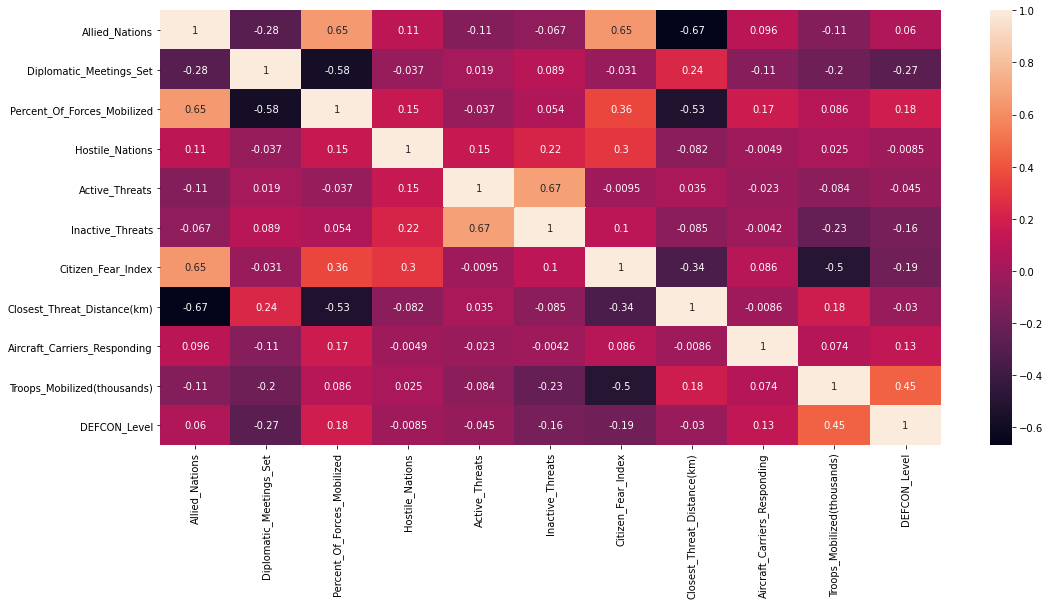

In [ ]:
plt.figure(figsize=(17.5,8))
sns.heatmap(defcon_df.drop(columns=['ID']).corr(),annot=True)
plt.show()

## Data Scaling

In [ ]:
trans_df = defcon_df.drop(columns=['ID','Closest_Threat_Distance(km)','Troops_Mobilized(thousands)'],axis=1)
trans_df['Closest_Threat_Distance_log'] = np.log(defcon_df['Closest_Threat_Distance(km)'])
trans_df['Troops_Mobilized_log'] = np.log(defcon_df['Troops_Mobilized(thousands)'])
trans_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Aircraft_Carriers_Responding,DEFCON_Level,Closest_Threat_Distance_log,Troops_Mobilized_log
0,16,1,0.67,3,6.0,25.0,0.787812,1,3,5.781854,13.667474
1,8,1,0.11,2,38.0,48.0,0.419236,0,4,5.884269,13.773855
2,9,1,0.49,3,32.0,69.0,0.582232,1,3,5.807662,13.636384


Now all the Feature Variables are on the same scale.

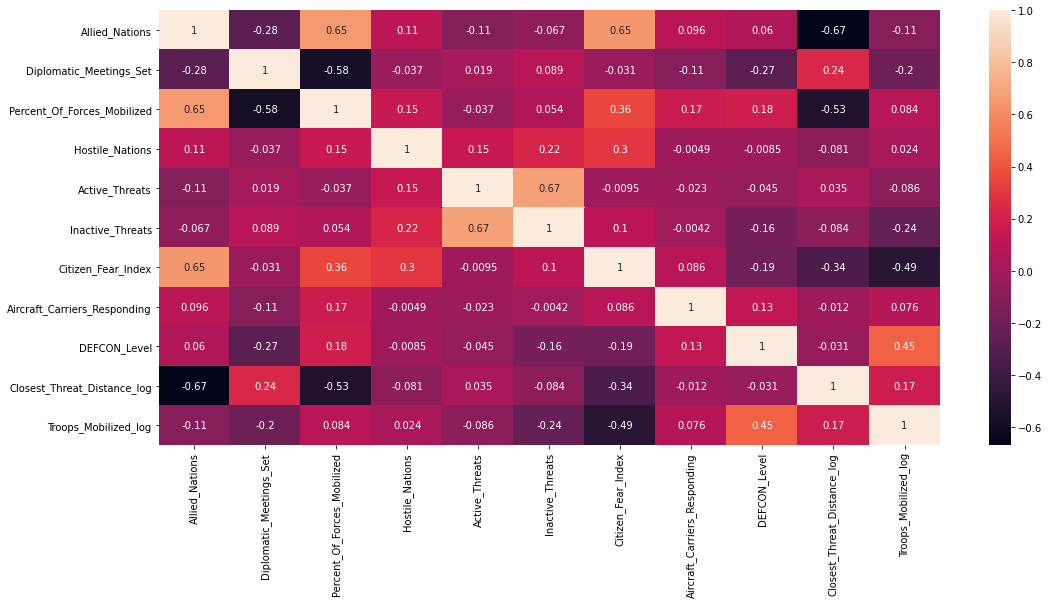

In [ ]:
plt.figure(figsize=(17.5,8))
sns.heatmap(trans_df.corr(),annot=True)
plt.show()

## KDE Plot to check class imbalance

In [ ]:
X=trans_df.drop(columns=['DEFCON_Level'],axis=1)
y=trans_df.DEFCON_Level

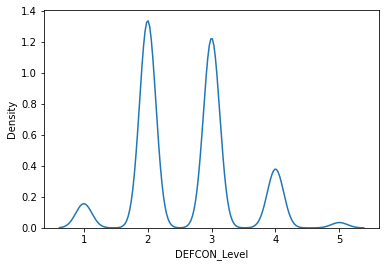

In [ ]:
plt.figure()
sns.kdeplot(trans_df.DEFCON_Level)
plt.show()

## Fixing Class Imbalance using Class_Weights

In [ ]:
X=trans_df.drop(columns=['DEFCON_Level'],axis=1)
y=trans_df.DEFCON_Level
y_tmp = y-1 #reducing y-value as class_weights imbalance method expects values from 0

In [ ]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced',np.unique(trans_df.DEFCON_Level),np.array(trans_df.DEFCON_Level)) 
d_class_weights = dict(enumerate(class_weight))
d_class_weights

{0: 4.016064257028113,
 1: 0.468384074941452,
 2: 0.5115089514066496,
 3: 1.6501650165016502,
 4: 18.181818181818183}

## Splitting data for Train, Test & Validation

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed=1000
tf.random.set_seed=42

X_train,X_test,y_train,y_test = train_test_split(X,y_tmp,test_size=0.2)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, train_size=0.5)

print('X_Train Shape',X_train.shape)
print('X_test Shape',X_test.shape)
print('X_validation Shape',X_validation.shape)
print('y_train Shape',y_train.shape)
print('y_test Shape',y_test.shape)
print('y_validation Shape',y_validation.shape)

X_Train Shape (8000, 10)
X_test Shape (1000, 10)
X_validation Shape (1000, 10)
y_train Shape (8000,)
y_test Shape (1000,)
y_validation Shape (1000,)


## 1. Class_Weights Class Imbalance method with Hidden Layers

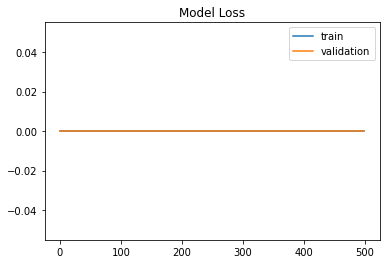

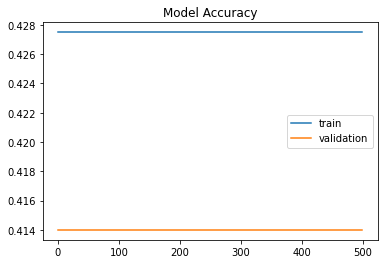

In [ ]:
#Create Model
model_hl = Sequential() #Initiailizing Sequential module
model_hl.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_hl.add(Dense(80,activation='relu'))
model_hl.add(Dense(60,activation='relu'))
model_hl.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_hl.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_hl = model_hl.fit(x=X_train,y=y_train,epochs=10,validation_data =(X_validation, y_validation), verbose=0,  CC

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_hl.history['loss'],label='train')
plt.plot(history_hl.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_hl.history['acc'],label='train')
plt.plot(history_hl.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_hl.history
dr_df_dict['Model']='Model With Hidden Layers'
dr_df_dict['To_Predict']='model_hl'
history_hl_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = history_hl_df[-1:]
final_df.reset_index(drop=True,inplace=True)

In [ ]:
final_df

,loss,acc,val_loss,val_acc,Model,To_Predict
0,0.0,0.4275,0.0,0.414,Model With Hidden Layers,model_hl


## 2. Class_Weights Class Imbalance method on L1 Regularizer

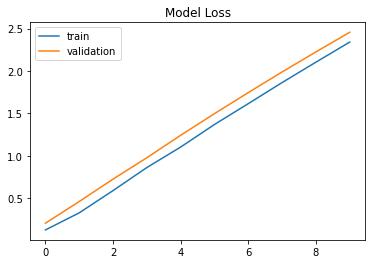

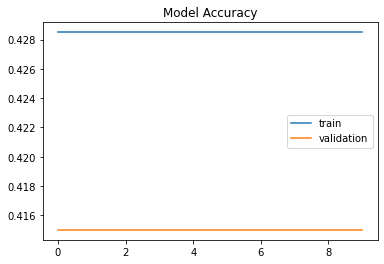

In [ ]:
#Create Model
model_l1 = Sequential() #Initiailizing Sequential module
model_l1.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001))) #Adding HiddenLayer and activation function
model_l1.add(Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(60,activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_l1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_l1 = model_l1.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0, class_weight=d_class_weights)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_l1.history['loss'],label='train')
plt.plot(history_l1.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_l1.history['acc'],label='train')
plt.plot(history_l1.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_l1.history
dr_df_dict['Model']='Model With HL & L1 Regularizer'
dr_df_dict['To_Predict']='model_l1'
history_l1_df = pd.DataFrame.from_dict(dr_df_dict)
final_df=final_df.append(history_l1_df[-1:])
final_df.reset_index(drop=True,inplace=True)

## 3. Class_Weights Class Imbalance method on L2 Regularizer

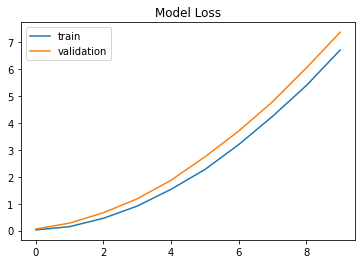

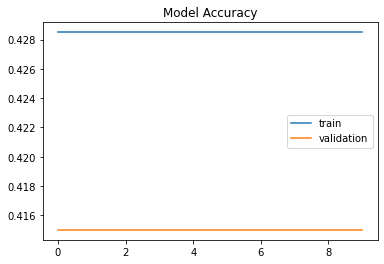

In [ ]:
#Create Model
model_l2 = Sequential() #Initiailizing Sequential module
model_l2.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #Adding HiddenLayer and activation function
model_l2.add(Dense(80,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_l2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_l2 = model_l2.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0, class_weight=d_class_weights)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_l2.history['loss'],label='train')
plt.plot(history_l2.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test accuracy
plt.title('Model Accuracy')
plt.plot(history_l2.history['acc'],label='train')
plt.plot(history_l2.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_l2.history
dr_df_dict['Model']='Model With HL & L2 Regularizer'
dr_df_dict['To_Predict']='model_l2'
history_l2_df = pd.DataFrame.from_dict(dr_df_dict)
final_df=final_df.append(history_l2_df[-1:])
final_df.reset_index(drop=True,inplace=True)

## 4. Class_Weights Class Imbalance method & Early Stopping Callback

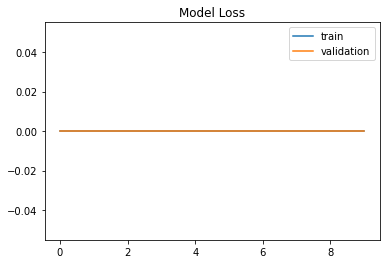

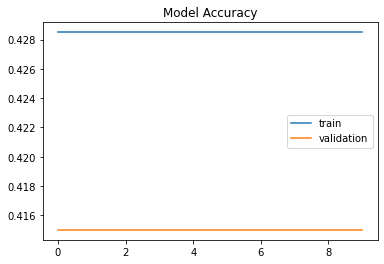

In [ ]:
#Create Model
model_es = Sequential() #Initiailizing Sequential module
model_es.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_es.add(Dense(80,activation='relu'))
model_es.add(Dense(60,activation='relu'))
model_es.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_es.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric 

#Defining parameters for EarlyStopping & ModelCheckPoint callback functions
es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0,restore_best_weights=True) #Defining parameter for Early Stopping call back

#fit the model 
history_es = model_es.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0, callbacks=[es], class_weight=d_class_weights)

print('\n')
#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_es.history['acc'],label='train')
plt.plot(history_es.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es.history
dr_df_dict['Model']='Model with EarlyStopping Callback'
dr_df_dict['To_Predict']='model_es'
history_es = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es[-1:])
final_df.reset_index(drop=True,inplace=True)

## 5. Class_Weights Class Imbalance method & Early Stopping & CheckPoint Callbacks

Train: 0.428500, Validation: 0.415000
Train Loss: 0.000000, Validation Loss: 0.000000




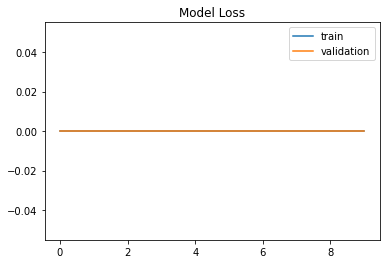

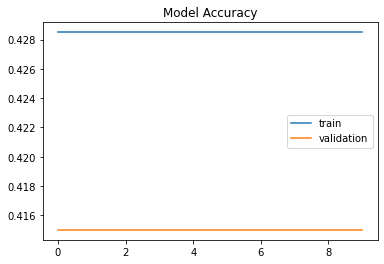

In [ ]:
#Create Model
model_es_cp = Sequential() #Initiailizing Sequential module
model_es_cp.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_es_cp.add(Dense(80,activation='relu'))
model_es_cp.add(Dense(60,activation='relu'))
model_es_cp.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_es_cp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#Defining parameters for EarlyStopping & ModelCheckPoint callback functions
es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0,restore_best_weights=True) #Defining parameter for Early Stopping call back
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=0,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

#fit the model 
history_es_cp = model_es_cp.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validation,y_validation), callbacks=[es,cp], verbose=0, class_weight=d_class_weights)
#save the best model
saved_model = load_model('best_model.h5')

#calculating Training & Validation Accuracy & Loss on the best model saved
train_loss, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
validation_loss, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('Train Loss: %3f, Validation Loss: %3f' % (train_loss,validation_loss))

print('\n')
#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_es_cp.history['loss'],label='train')
plt.plot(history_es_cp.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_es_cp.history['acc'],label='train')
plt.plot(history_es_cp.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_cp.history
dr_df_dict['Model']='Model with Early Stopping & Checkpoint Callbacks'
dr_df_dict['To_Predict']='model_es_cp'
history_es_cp_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_cp_df[-1:])
final_df.reset_index(drop=True,inplace=True)

tmp_df = {'loss':train_loss,'acc':train_acc,'val_loss':validation_loss,'val_acc':validation_acc,'Model':'Best Model with Early Stopping & Checkpoint Callbacks','To_Predict':'saved_model'}
final_df = final_df.append(tmp_df,ignore_index=True)

## 6. Class_Weights Class Imbalance method with Early Stopping & CheckPoint Callbacks & Dropout

Train: 0.428500, Validation: 0.415000
Train Loss: 0.000000, Validation Loss: 0.000000




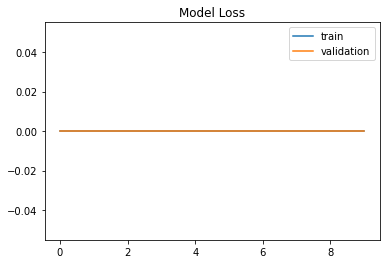

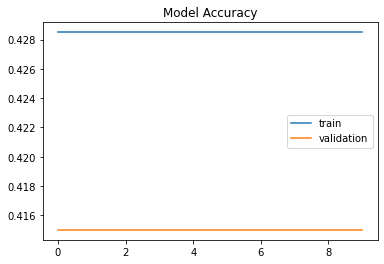

In [ ]:
model_es_cp_do = Sequential()
model_es_cp_do.add(Dense(100,activation='relu')), Dropout(0.5)
model_es_cp_do.add(Dense(80,activation='relu')), Dropout(0.5)
model_es_cp_do.add(Dense(60,activation='relu')), Dropout(0.5)
model_es_cp_do.add(Dense(1,activation='softmax'))

model_es_cp_do.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=0,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp_do = model_es_cp_do.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp],verbose=0, class_weight = d_class_weights)
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model_do = load_model('best_model.h5')

#calculating Training & Validation Accuracy & Loss on the best model saved
train_loss, train_acc = saved_model_do.evaluate(X_train,y_train,verbose=0)
validation_loss, validation_acc = saved_model_do.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('Train Loss: %3f, Validation Loss: %3f' % (train_loss,validation_loss))

print('\n')
#plot to see training & validation loss
plt.title('Model Loss')
plt.plot(history_es_cp_do.history['loss'],label='train')
plt.plot(history_es_cp_do.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & validation accuracy
plt.title('Model Accuracy')
plt.plot(history_es_cp_do.history['acc'],label='train')
plt.plot(history_es_cp_do.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_cp_do.history
dr_df_dict['Model']='Model With Dropout & EarlyStopping, CheckPoint Callbacks'
dr_df_dict['To_Predict']='model_es_cp_do'
history_es_cp_do = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_cp_do[-1:])
final_df.reset_index(drop=True,inplace=True)

tmp_df = {'loss':train_loss,'acc':train_acc,'val_loss':validation_loss,'val_acc':validation_acc,'Model':'Best Model with Dropout & Early Stopping, Checkpoint Callbacks','To_Predict':'saved_model_do'}
final_df = final_df.append(tmp_df,ignore_index=True)

In [ ]:
final_df

,loss,acc,val_loss,val_acc,Model,To_Predict
0,0.000000,0.4285,0.000000,0.415,Model With Hidden Layers,model_hl
1,2.341274,0.4285,2.456820,0.415,Model With HL & L1 Regularizer,model_l1
2,6.718333,0.4285,7.380566,0.415,Model With HL & L2 Regularizer,model_l2
3,0.000000,0.4285,0.000000,0.415,Model with EarlyStopping Callback,model_es
4,0.000000,0.4285,0.000000,0.415,Model with Early Stopping & Checkpoint Callbacks,model_es_cp
5,0.000000,0.4285,0.000000,0.415,Best Model with Early Stopping & Checkpoint Ca...,saved_model
6,0.000000,0.4285,0.000000,0.415,"Model With Dropout & EarlyStopping, CheckPoint...",model_es_cp_do
7,0.000000,0.4285,0.000000,0.415,"Best Model with Dropout & Early Stopping, Chec...",saved_model_do


## Fixing Class Imbalance using SMOTE

In [ ]:
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
balanced_df = pd.DataFrame(X_smote, columns = ['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)'])
balanced_df['DEFCON_Level'] = y_smote
balanced_df.head(3)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
0,16.0,1.0,0.67,3.0,6.0,25.0,0.787812,1.0,5.781854,13.667474,3
1,8.0,1.0,0.11,2.0,38.0,48.0,0.419236,0.0,5.884269,13.773855,4
2,9.0,1.0,0.49,3.0,32.0,69.0,0.582232,1.0,5.807662,13.636384,3


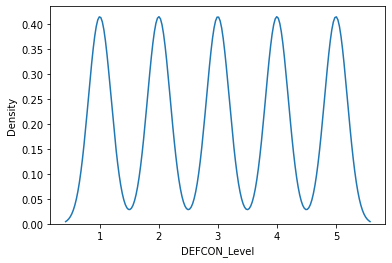

In [ ]:
plt.figure()
sns.kdeplot(balanced_df.DEFCON_Level)
plt.show()

## Train, Test & Validation split on new data where class imbalance is fixed using SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed=1000
tf.random.set_seed=42

X_train,X_test,y_train,y_test = train_test_split(balanced_df.drop(columns=['DEFCON_Level']),balanced_df.DEFCON_Level,test_size=0.2)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, train_size=0.5)

print('X_Train Shape',X_train.shape)
print('X_test Shape',X_test.shape)
print('X_validation Shape',X_validation.shape)
print('y_train Shape',y_train.shape)
print('y_test Shape',y_test.shape)
print('y_validation Shape',y_validation.shape)

X_Train Shape (17080, 10)
X_test Shape (2135, 10)
X_validation Shape (2135, 10)
y_train Shape (17080,)
y_test Shape (2135,)
y_validation Shape (2135,)


## 7. SMOTE Class Imbalance method with Hidden Layers

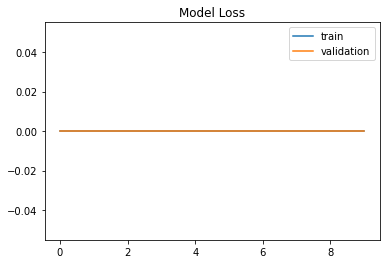

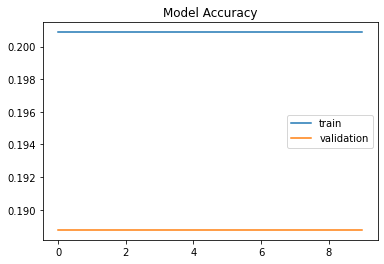

In [ ]:
#Create Model
model_hl_sm = Sequential() #Initiailizing Sequential module
model_hl_sm.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_hl_sm.add(Dense(80,activation='relu'))
model_hl_sm.add(Dense(60,activation='relu'))
model_hl_sm.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_hl_sm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_hl_sm = model_hl_sm.fit(x=X_train,y=y_train,epochs=10,validation_data =(X_validation, y_validation), verbose=0)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_hl_sm.history['loss'],label='train')
plt.plot(history_hl_sm.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_hl_sm.history['acc'],label='train')
plt.plot(history_hl_sm.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_hl_sm.history
dr_df_dict['Model']='Model With Hidden Layers & SMOTE Imbalance'
dr_df_dict['To_Predict']='model_hl_sm'
history_hl_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_hl_df[-1:])
final_df.reset_index(drop=True,inplace=True)

## 8. SMOTE Class Imbalance method with L1 Regularizer

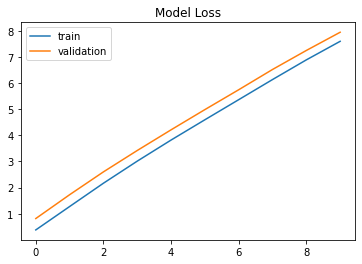

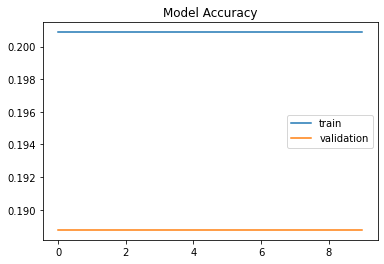

In [ ]:
#Create Model
model_l1_sm = Sequential() #Initiailizing Sequential module
model_l1_sm.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001))) #Adding HiddenLayer and activation function
model_l1_sm.add(Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1_sm.add(Dense(60,activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1_sm.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_l1_sm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_l1_sm = model_l1_sm.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_l1_sm.history['loss'],label='train')
plt.plot(history_l1_sm.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_l1_sm.history['acc'],label='train')
plt.plot(history_l1_sm.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_l1_sm.history
dr_df_dict['Model']='Model With HL & L1 Regularizer & SMOTE Imbalance'
dr_df_dict['To_Predict']='model_l1_sm'
history_l1_df = pd.DataFrame.from_dict(dr_df_dict)
final_df=final_df.append(history_l1_df[-1:])
final_df.reset_index(drop=True,inplace=True)

## 9. SMOTE Class Imbalance method with L2 Regularizer

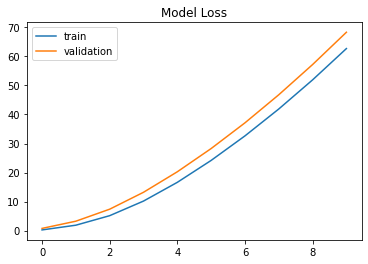

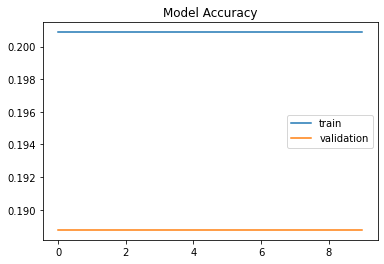

In [ ]:
#Create Model
model_l2_sm = Sequential() #Initiailizing Sequential module
model_l2_sm.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #Adding HiddenLayer and activation function
model_l2_sm.add(Dense(80,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2_sm.add(Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2_sm.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_l2_sm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_l2_sm = model_l2_sm.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_l2_sm.history['loss'],label='train')
plt.plot(history_l2_sm.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test accuracy
plt.title('Model Accuracy')
plt.plot(history_l2_sm.history['acc'],label='train')
plt.plot(history_l2_sm.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_l2_sm.history
dr_df_dict['Model']='Model With HL & L2 Regularizer & SMOTE Imbalance'
dr_df_dict['To_Predict']='model_l2_sm'
history_l2_df = pd.DataFrame.from_dict(dr_df_dict)
final_df=final_df.append(history_l2_df[-1:])
final_df.reset_index(drop=True,inplace=True)

## 10. SMOTE Class Imbalance method with Early Stopping Callback

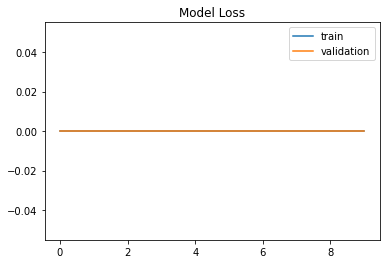

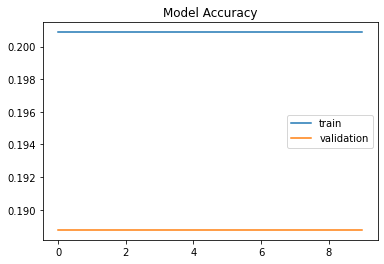

In [ ]:
#Create Model
model_es_sm = Sequential() #Initiailizing Sequential module
model_es_sm.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_es_sm.add(Dense(80,activation='relu'))
model_es_sm.add(Dense(60,activation='relu'))
model_es_sm.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_es_sm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric 

#Defining parameters for EarlyStopping & ModelCheckPoint callback functions
es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0) #Defining parameter for Early Stopping call back

#fit the model 
history_es_sm = model_es_sm.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es],verbose=0)

print('\n')
#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_es_sm.history['loss'],label='train')
plt.plot(history_es_sm.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_es_sm.history['acc'],label='train')
plt.plot(history_es_sm.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_sm.history
dr_df_dict['Model']='Model with EarlyStopping Callback & SMOTE Imbalance'
dr_df_dict['To_Predict']='model_es_sm'
history_es_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_df[-1:])
final_df.reset_index(drop=True,inplace=True)

## 11. SMOTE Class Imbalance method with Early Stopping & Checkpoint Callbacks

Train: 0.200878, Validation: 0.188759
Train Loss: 0.000000, Validation Loss: 0.000000




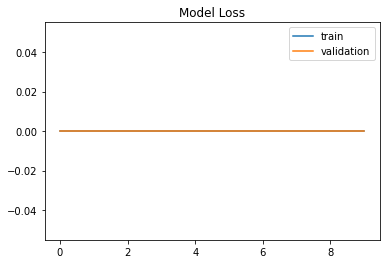

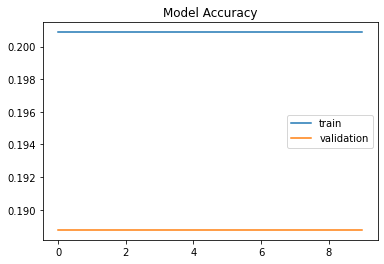

In [ ]:
#Create Model
model_es_cp_sm = Sequential() #Initiailizing Sequential module
model_es_cp_sm.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_es_cp_sm.add(Dense(80,activation='relu'))
model_es_cp_sm.add(Dense(60,activation='relu'))
model_es_cp_sm.add(Dense(1,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_es_cp_sm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#Defining parameters for EarlyStopping & ModelCheckPoint callback functions
es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0) #Defining parameter for Early Stopping call back
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=0,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

#fit the model 
history_es_cp_sm = model_es_cp_sm.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validation,y_validation), callbacks=[es,cp], verbose=0)
#save the best model
saved_model_sm = load_model('best_model.h5')

#calculating Training & Validation Accuracy & Loss on the best model saved
train_loss, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
validation_loss, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('Train Loss: %3f, Validation Loss: %3f' % (train_loss,validation_loss))

print('\n')
#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_es_cp_sm.history['loss'],label='train')
plt.plot(history_es_cp_sm.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_es_cp_sm.history['acc'],label='train')
plt.plot(history_es_cp_sm.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_cp_sm.history
dr_df_dict['Model']='Model with Early Stopping & Checkpoint Callbacks & SMOTE Imbalance'
dr_df_dict['To_Predict']='model_es_cp_sm'
history_es_cp_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_cp_df[-1:])
final_df.reset_index(drop=True,inplace=True)

tmp_df = {'loss':train_loss,'acc':train_acc,'val_loss':validation_loss,'val_acc':validation_acc,'Model':'Best Model with Early Stopping & Checkpoint Callbacks','To_Predict':'saved_model_sm'}
final_df = final_df.append(tmp_df,ignore_index=True)

## 12. SMOTE Class Imbalance method with Dropout

Train: 0.200878, Validation: 0.188759
Train Loss: 0.000000, Validation Loss: 0.000000




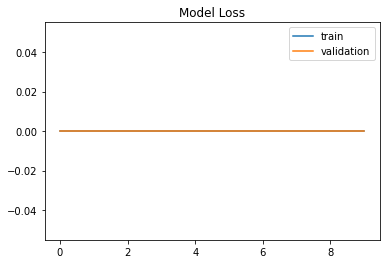

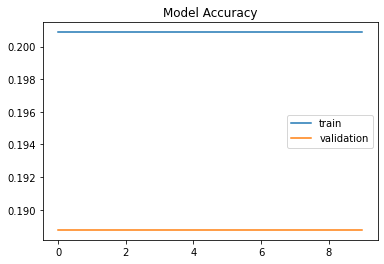

In [ ]:
model_es_cp_do_sm = Sequential()
model_es_cp_do_sm.add(Dense(100,activation='relu')), Dropout(0.5)
model_es_cp_do_sm.add(Dense(80,activation='relu')), Dropout(0.5)
model_es_cp_do_sm.add(Dense(60,activation='relu')), Dropout(0.5)
model_es_cp_do_sm.add(Dense(1,activation='softmax'))

model_es_cp_do_sm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=0,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp_do_sm = model_es_cp_do_sm.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp],verbose=0)
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model_do_sm = load_model('best_model.h5')

#calculating Training & Validation Accuracy & Loss on the best model saved
train_loss, train_acc = saved_model_do.evaluate(X_train,y_train,verbose=0)
validation_loss, validation_acc = saved_model_do.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('Train Loss: %3f, Validation Loss: %3f' % (train_loss,validation_loss))

print('\n')
#plot to see training & validation loss
plt.title('Model Loss')
plt.plot(history_es_cp_do_sm.history['loss'],label='train')
plt.plot(history_es_cp_do_sm.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & validation accuracy
plt.title('Model Accuracy')
plt.plot(history_es_cp_do_sm.history['acc'],label='train')
plt.plot(history_es_cp_do_sm.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_cp_do_sm.history
dr_df_dict['Model']='Model With Dropout & EarlyStopping, CheckPoint Callbacks & SMOTE Imbalance'
dr_df_dict['To_Predict']='model_es_cp_do_sm'
history_es_cp_do_sm = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_cp_do_sm[-1:])
final_df.reset_index(drop=True,inplace=True)

tmp_df = {'loss':train_loss,'acc':train_acc,'val_loss':validation_loss,'val_acc':validation_acc,'Model':'Best Model with Dropout & Early Stopping, Checkpoint Callbacks','To_Predict':'saved_model_do_sm'}
final_df = final_df.append(tmp_df,ignore_index=True)

## Dataframe which shows Loss & Accuracy of Train & Validation data

In [ ]:
final_df

,loss,acc,val_loss,val_acc,Model,To_Predict
0,0.000000,0.428500,0.000000,0.415000,Model With Hidden Layers,model_hl
1,2.341274,0.428500,2.456820,0.415000,Model With HL & L1 Regularizer,model_l1
2,6.718333,0.428500,7.380566,0.415000,Model With HL & L2 Regularizer,model_l2
3,0.000000,0.428500,0.000000,0.415000,Model with EarlyStopping Callback,model_es
4,0.000000,0.428500,0.000000,0.415000,Model with Early Stopping & Checkpoint Callbacks,model_es_cp
5,0.000000,0.428500,0.000000,0.415000,Best Model with Early Stopping & Checkpoint Ca...,saved_model
6,0.000000,0.428500,0.000000,0.415000,"Model With Dropout & EarlyStopping, CheckPoint...",model_es_cp_do
7,0.000000,0.428500,0.000000,0.415000,"Best Model with Dropout & Early Stopping, Chec...",saved_model_do
8,0.000000,0.200878,0.000000,0.188759,Model With Hidden Layers & SMOTE Imbalance,model_hl_sm
9,7.595619,0.200878,7.942715,0.188759,Model With HL & L1 Regularizer & SMOTE Imbalance,model_l1_sm


### The above Dataframe also shows the Model implemented and the variable (To_Predict) which you can use to predict for that model.

## Test Data Prediction based on choosen Model

In [ ]:
predictions = model_hl.predict(X_test) #predicting value using the Early Stopping model.

## Evaluating Test Data Accuracy & Loss

In [ ]:
test_loss, test_acc = model_hl.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy is: %3f & Test Loss is: %3f' % (test_acc,test_loss))

Test Accuracy is: 0.436000 & Test Loss is: 0.000000
